## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer #considers how common the word occur in the email
from sklearn.naive_bayes import GaussianNB, MultinomialNB #algorithms for classification tasks
from sklearn.metrics import classification_report, confusion_matrix

## Reading data

In [ ]:
df = pd.read_csv('/content/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Added name to the first column as "ID"

In [ ]:
df.rename(columns = {'Unnamed: 0': 'ID'},inplace = True)


In [ ]:
df.head()

,ID,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Generating Profile Report

In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=86300d9919b22a820686b8cec4dc1344dea8aa9d81883008f138e57738295dbd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


# Profile Report

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport = ProfileReport(df)
ProfileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the data report, we came to know the following things:
-- Data has no missing values
-- Each column is highly correlated to with each other.
-- The number of ham(3672) emails is more than the spam(1499)

# Data Statistics

In [ ]:
df.describe()

,ID,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df.shape
# 5171 rows and 4 columns

(5171, 4)

# Finding Nunique values

In [ ]:
df.nunique()

ID           5171
label           2
text         4993
label_num       2
dtype: int64

# Adding a column length to check the length of messages

In [ ]:
df['length'] = df['text'].apply(len)
df.head()

,ID,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


## Distribution on column length to check which text has highest length

Text(0, 0.5, 'Count')

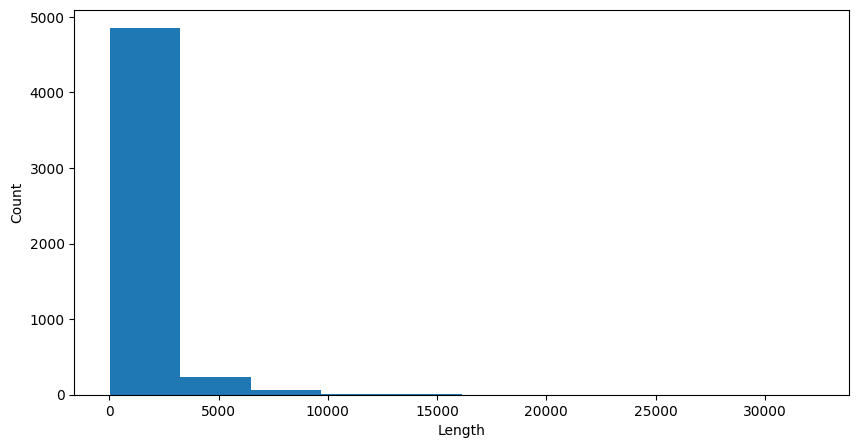

In [ ]:
plt.figure(figsize = (10,5))
hist_graph = df['length'].plot(kind = 'hist')
hist_graph.set_xlabel("Length")
hist_graph.set_ylabel("Count")


The graph elaborates that there are some messages who length is above 4000 or upto 5000


## With data statistics we are going to find the longest message in this dataset

In [ ]:
df.length.describe()

count     5171.000000
mean      1048.390447
std       1528.514135
min         11.000000
25%        244.000000
50%        540.000000
75%       1237.000000
max      32258.000000
Name: length, dtype: float64

The highest message length is 32258 which clearly explains that it is a spam, because spam messages tend to have more text than ham data.

# Pre Processing

# Removing Punctuations

In [ ]:
import string
text = df['text']
translator = str.maketrans('', '', string.punctuation)
## using maketrans method to gather punctuations
df['text'] = text.apply(lambda x: x.translate(translator))
#applying translate() to remove punctuations
df.head()

,ID,label,text,label_num,length
0,605,ham,Subject enron methanol meter 988291\r\nthis...,0,327
1,2349,ham,Subject hpl nom for january 9 2001\r\n see at...,0,97
2,3624,ham,Subject neon retreat\r\nho ho ho we re aroun...,0,2524
3,4685,spam,Subject photoshop windows office cheap mai...,1,414
4,2030,ham,Subject re indian springs\r\nthis deal is to ...,0,336


# Data Test and Train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)
# 30% data for testing and 70% for training

# Vectorization

In [ ]:
cv = CountVectorizer() # converts the words into tokenization, converts raw text into numerical representation that machine learning understands.
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

## TF-IDF

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)
# training and transforming the training dataset into TF-IDF

#Training model on Naive Bayes

In [ ]:
Gnb = GaussianNB()   #ensures that the probability calculated is normal
Mnb = MultinomialNB()
Gnb_model = Gnb.fit(X_train.toarray(), y_train) #The toarray() method is used on sparse matrices((when there are many 0s in model) in scikit-learn to convert them into dense NumPy arrays
Mnb_model = Mnb.fit(X_train.toarray(), y_train)

#Prediction

In [ ]:
print("Prediction for Gaussian Naive Bayes:", Gnb_model.predict(X_test.toarray()))

Predicted: ['ham' 'spam' 'ham' ... 'ham' 'spam' 'ham']


In [ ]:
print("Prediction for Multinomial Naive Bayes:", Mnb_model.predict(X_test.toarray()))

Prediction for Multinomial Naive Bayes: ['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


#Classification Report

# Gaussian Naivr Bayes

In [ ]:
print(classification_report(y_test, Gnb_model.predict(X_test.toarray())))

              precision    recall  f1-score   support

         ham       0.96      0.97      0.97      1121
        spam       0.92      0.90      0.91       431

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552



# Multinomial Algorithm

In [ ]:
print(classification_report(y_test, Mnb_model.predict(X_test.toarray())))

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92      1121
        spam       1.00      0.52      0.69       431

    accuracy                           0.87      1552
   macro avg       0.92      0.76      0.80      1552
weighted avg       0.89      0.87      0.85      1552



Overall the accuracy of Gaussian Naive Bayes is more than Multinomial Bayes i.e 95% but we cannot rely on accuracy only so moving forward to analyze th confusion matrix

#Confusion Matrix for Gnb

In [ ]:
confusion_matrix(y_test, Gnb_model.predict(X_test.toarray()))

array([[1088,   33],
       [  41,  390]])

# Plotting Confusion matrix

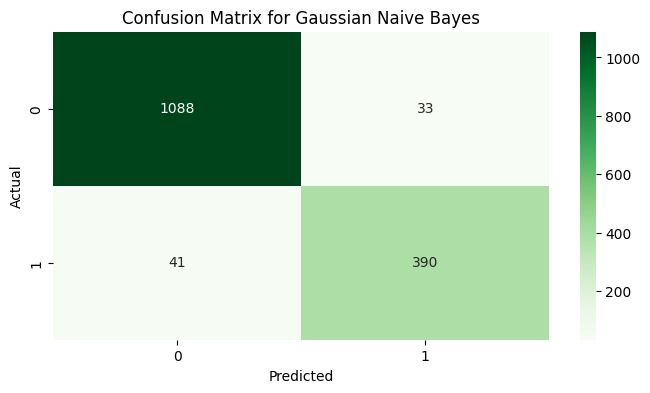

In [ ]:
plt.figure(figsize = ( 8,4))
sns.heatmap(confusion_matrix(y_test, Gnb_model.predict(X_test.toarray())), annot = True, fmt = 'd', cmap = 'Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

- 1088 instances are correctly classified as "Ham"(True Negative)
- 33 instances were incorrectly classified as "Ham (False Positive)
- 41 were incorrectly classified "Spam"
- 390 were correctly classified "Spam"

# Confusion matrix for multinomial bayes

In [ ]:
confusion_matrix(y_test, Mnb_model.predict(X_test.toarray()))

array([[1121,    0],
       [ 205,  226]])

# Plotting

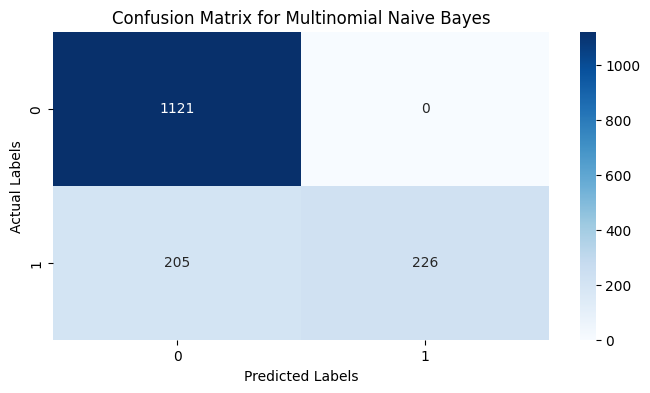

In [ ]:
plt.figure(figsize= (8,4))
sns.heatmap(confusion_matrix(y_test, Mnb_model.predict(X_test.toarray())), annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

- 1121 considered as "Ham"
- 0 were considered incorrectly as "Ham"
- 205 were incorrectly classified as "Spam" when they were actually "ham"
- 226 were correctly identified as "Spam"